## Research Task - Incorporate feedback to Transit Performance Metrics Portfolio #1514

via Juan Matute
>If you're taking requests, I'd like to see the Table 8.1 performance metrics on a statewide basis, along with a 
>- list for each performance metric of which individual transit agency-mode of service combinations are 
>- in the bottom 5% (approximately two standard deviations from the mean) for each. 
>
>This would be illustrative for discussion purposes.


## Table 8.1
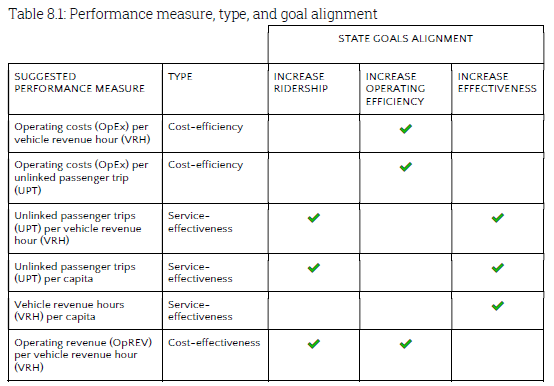

In [11]:
import pandas as pd
from new_transit_metrics_utils import GCS_FILE_PATH, sum_by_group, make_long

In [6]:
df = pd.read_parquet(f"{GCS_FILE_PATH}raw_transit_performance_metrics_data.parquet")

In [31]:
display(
    df.info(),
    df.head(),
    df["year"].value_counts(),
    df["agency_status"].value_counts()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2090
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   agency_name       2091 non-null   object  
 1   agency_status     2091 non-null   object  
 2   city              2091 non-null   object  
 3   mode              2091 non-null   object  
 4   service           2091 non-null   object  
 5   ntd_id            2091 non-null   object  
 6   reporter_type     2091 non-null   object  
 7   reporting_module  2091 non-null   object  
 8   state             2091 non-null   object  
 9   primary_uza_name  2091 non-null   object  
 10  year              2091 non-null   object  
 11  upt               2091 non-null   int64   
 12  vrh               2091 non-null   int64   
 13  vrm               2091 non-null   int64   
 14  opexp_total       2091 non-null   int64   
 15  RTPA              2091 non-null   object  
 16  _merge            2091 n

None

,agency_name,agency_status,city,mode,service,ntd_id,reporter_type,reporting_module,state,primary_uza_name,year,upt,vrh,vrm,opexp_total,RTPA,_merge
0,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2019,13112,2997,43696,572799,Tulare County Association of Governments,both
1,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2020,11523,3669,48138,686165,Tulare County Association of Governments,both
2,City of Porterville (COLT) - Transit Department,Active,Porterville,Bus,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2018,635648,50140,700127,3460906,Tulare County Association of Governments,both
3,City of Porterville (COLT) - Transit Department,Active,Porterville,Bus,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2021,145215,21208,244230,2657959,Tulare County Association of Governments,both
4,City of Porterville (COLT) - Transit Department,Active,Porterville,Demand Response,Purchased Transportation,90198,Building Reporter,Urban,CA,"Porterville, CA",2021,29380,9565,126604,952031,Tulare County Association of Governments,both


2019    358
2020    355
2018    348
2021    347
2022    345
2023    338
Name: year, dtype: int64

Active      2035
Inactive      56
Name: agency_status, dtype: int64

In [17]:
agency_cols = ["ntd_id", "agency_name", "RTPA","mode", "service"]

val_cols = [
    "opex_per_vrh",
    "opex_per_vrm",
    "upt_per_vrh",
    "upt_per_vrm",
    "opex_per_upt",
]

In [12]:
by_agency = sum_by_group(df, agency_cols)

In [15]:
by_agency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ntd_id        2091 non-null   object 
 1   agency_name   2091 non-null   object 
 2   RTPA          2091 non-null   object 
 3   mode          2091 non-null   object 
 4   service       2091 non-null   object 
 5   year          2091 non-null   object 
 6   upt           2091 non-null   int64  
 7   vrm           2091 non-null   int64  
 8   vrh           2091 non-null   int64  
 9   opexp_total   2091 non-null   int64  
 10  opex_per_vrh  2067 non-null   float64
 11  opex_per_vrm  2067 non-null   float64
 12  upt_per_vrh   2046 non-null   float64
 13  upt_per_vrm   2046 non-null   float64
 14  opex_per_upt  2067 non-null   float64
dtypes: float64(5), int64(4), object(6)
memory usage: 245.2+ KB


In [21]:
by_agency.describe()

,upt,vrm,vrh,opexp_total,opex_per_vrh,opex_per_vrm,upt_per_vrh,upt_per_vrm,opex_per_upt
count,2.091000e+03,2.091000e+03,2.091000e+03,2.091000e+03,2067.000,2067.000,2046.000000,2046.000000,2067.000
mean,2.660662e+06,1.754771e+06,1.161680e+05,2.223394e+07,inf,inf,9.974902,0.812825,inf
std,1.405787e+07,5.856907e+06,3.934805e+05,8.622174e+07,NaN,NaN,15.253309,1.572094,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,18.400,0.430,0.000000,0.000000,1.390
25%,1.887900e+04,6.586950e+04,5.847500e+03,5.853455e+05,84.045,6.220,2.300000,0.180000,10.220
50%,7.961300e+04,2.583970e+05,1.750400e+04,1.841343e+06,115.710,8.950,4.885000,0.350000,23.350
75%,5.417190e+05,1.021278e+06,6.606900e+04,8.832687e+06,164.085,13.245,11.685000,0.800000,50.385
max,2.609022e+08,8.378382e+07,6.341989e+06,1.355086e+09,inf,inf,170.950000,21.330000,inf


In [26]:
by_agency.fillna(0).head()

,ntd_id,agency_name,RTPA,mode,service,year,upt,vrm,vrh,opexp_total,opex_per_vrh,opex_per_vrm,upt_per_vrh,upt_per_vrm,opex_per_upt
0,90003,San Francisco Bay Area Rapid Transit District ...,Metropolitan Transportation Commission,Bus,Purchased Transportation,2018,0,0,0,19067,inf,inf,0.0,0.0,inf
1,90003,San Francisco Bay Area Rapid Transit District ...,Metropolitan Transportation Commission,Bus,Purchased Transportation,2019,0,0,0,513,inf,inf,0.0,0.0,inf
2,90003,San Francisco Bay Area Rapid Transit District ...,Metropolitan Transportation Commission,Demand Response,Purchased Transportation,2018,0,0,0,390717,inf,inf,0.0,0.0,inf
3,90003,San Francisco Bay Area Rapid Transit District ...,Metropolitan Transportation Commission,Demand Response,Purchased Transportation,2019,0,0,0,368934,inf,inf,0.0,0.0,inf
4,90003,San Francisco Bay Area Rapid Transit District ...,Metropolitan Transportation Commission,Demand Response,Purchased Transportation,2020,0,0,0,494779,inf,inf,0.0,0.0,inf


# Dealing with NaN and inf values
Some of the metric calculation results in either inf or NaN values due to divide-by-zero scenarios. These values break the standard devatition calculation.

We will analyze the differences in standard deviation by filtering the data by these scenarios
1. remove rows with zeros
2. 
    1. upt_per_vrh/vrm NaN (0/0) values replaced with zero. Zero riders per revenue mile/hours still make sense.
    2. opex_per_upt/vrm/vrh inf (#/0) values replaced with its opexp value. operating cost still exist even if nobody rides the bus. highlights inefficienies 
    3. opex_per_upt/vrm/vrh NaN (0/0) values replaced with zeros. 

In [53]:
# any rows with zero upt/vrh/vrm/opex?
no_zero_rows = by_agency[
    (by_agency["upt"] != 0) 
    & (by_agency["vrh"] != 0)
    & (by_agency["vrm"] != 0)
    & (by_agency["opexp_total"] != 0)
]

display(
    no_zero_rows.std(),
    no_zero_rows.describe(),
    no_zero_rows.quantile(0.05)
)

/tmp/ipykernel_795/1732607081.py:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  no_zero_rows.std(),
/tmp/ipykernel_795/1732607081.py:12: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  no_zero_rows.quantile(0.05)


upt             1.420945e+07
vrm             5.916463e+06
vrh             3.974936e+05
opexp_total     8.712475e+07
opex_per_vrh    2.911860e+02
opex_per_vrm    3.520245e+01
upt_per_vrh     1.525544e+01
upt_per_vrm     1.572375e+00
opex_per_upt    6.136254e+01
dtype: float64

,upt,vrm,vrh,opexp_total,opex_per_vrh,opex_per_vrm,upt_per_vrh,upt_per_vrm,opex_per_upt
count,2.045000e+03,2.045000e+03,2.045000e+03,2.045000e+03,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000
mean,2.720511e+06,1.794233e+06,1.187789e+05,2.271224e+07,169.954249,14.144582,9.979780,0.813222,37.891888
std,1.420945e+07,5.916463e+06,3.974936e+05,8.712475e+07,291.185996,35.202453,15.255443,1.572375,61.362544
min,3.000000e+01,1.100000e+02,9.000000e+00,2.590000e+02,18.400000,0.430000,0.100000,0.010000,1.390000
25%,2.083600e+04,7.198600e+04,6.401000e+03,6.464380e+05,83.560000,6.200000,2.300000,0.180000,10.120000
50%,8.587400e+04,2.687820e+05,1.814100e+04,1.951564e+06,115.010000,8.900000,4.890000,0.350000,22.900000
75%,5.671030e+05,1.081022e+06,6.778000e+04,9.522214e+06,162.380000,13.050000,11.690000,0.800000,49.560000
max,2.609022e+08,8.378382e+07,6.341989e+06,1.355086e+09,6685.310000,893.830000,170.950000,21.330000,1331.430000


upt               3859.400
vrm              14944.600
vrh               1454.800
opexp_total     161421.600
opex_per_vrh        52.022
opex_per_vrm         2.872
upt_per_vrh          1.380
upt_per_vrm          0.090
opex_per_upt         4.392
Name: 0.05, dtype: float64

In [28]:
by_agency.replace([float("inf")],0).fillna(0).head()

,ntd_id,agency_name,RTPA,mode,service,year,upt,vrm,vrh,opexp_total,opex_per_vrh,opex_per_vrm,upt_per_vrh,upt_per_vrm,opex_per_upt
0,90003,San Francisco Bay Area Rapid Transit District ...,Metropolitan Transportation Commission,Bus,Purchased Transportation,2018,0,0,0,19067,0.0,0.0,0.0,0.0,0.0
1,90003,San Francisco Bay Area Rapid Transit District ...,Metropolitan Transportation Commission,Bus,Purchased Transportation,2019,0,0,0,513,0.0,0.0,0.0,0.0,0.0
2,90003,San Francisco Bay Area Rapid Transit District ...,Metropolitan Transportation Commission,Demand Response,Purchased Transportation,2018,0,0,0,390717,0.0,0.0,0.0,0.0,0.0
3,90003,San Francisco Bay Area Rapid Transit District ...,Metropolitan Transportation Commission,Demand Response,Purchased Transportation,2019,0,0,0,368934,0.0,0.0,0.0,0.0,0.0
4,90003,San Francisco Bay Area Rapid Transit District ...,Metropolitan Transportation Commission,Demand Response,Purchased Transportation,2020,0,0,0,494779,0.0,0.0,0.0,0.0,0.0


In [29]:
by_agency.replace([float("inf")],0).fillna(0).std()

/tmp/ipykernel_795/4239628692.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  by_agency.replace([float("inf")],0).fillna(0).std()


upt             1.405787e+07
vrm             5.856907e+06
vrh             3.934805e+05
opexp_total     8.622174e+07
opex_per_vrh    3.011523e+02
opex_per_vrm    3.928977e+01
upt_per_vrh     1.515751e+01
upt_per_vrm     1.559546e+00
opex_per_upt    6.093762e+01
dtype: float64

In [18]:
# by_agency_long = make_long(df=by_agency, group_cols=agency_cols, value_cols=val_cols)